In [1]:
import pandas as pd
import numpy as np

# 提高输出效率库
from IPython.core.interactiveshell import InteractiveShell # 实现 notebook 的多行输出
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'

# 重复值处理

In [2]:
df = pd.DataFrame(
    {'id': [1,1,1,3,4,5],
    'name': ['李想', '李想', '马克', '米琪', '苏丽', '李芳'],
    'salary': [5000, 5000, 4500, 6000, 64000, np.nan],
    'group': [1,1,1,2,1,2]}
)

df

id name   salary  group
0   1   李想   5000.0      1
1   1   李想   5000.0      1
2   1   马克   4500.0      1
3   3   米琪   6000.0      2
4   4   苏丽  64000.0      1
5   5   李芳      NaN      2

## drop_duplicates()

In [3]:
df.drop_duplicates()

id name   salary  group
0   1   李想   5000.0      1
2   1   马克   4500.0      1
3   3   米琪   6000.0      2
4   4   苏丽  64000.0      1
5   5   李芳      NaN      2

In [4]:
df.drop_duplicates(subset=['id'])

id name   salary  group
0   1   李想   5000.0      1
3   3   米琪   6000.0      2
4   4   苏丽  64000.0      1
5   5   李芳      NaN      2

## duplicated()

In [5]:
df[df.duplicated(subset=['id', 'name'])]

id name  salary  group
1   1   李想  5000.0      1

In [6]:
df[df.duplicated(subset=['id', 'group'])]

id name  salary  group
1   1   李想  5000.0      1
2   1   马克  4500.0      1

# 缺失值处理

In [7]:
df = pd.DataFrame(
    {'group': [1, np.nan, 1, 2, 1, np.nan],
    'name': ['张军', '朱莉', '杨建', '李兰英', '叶鹏', np.nan],
    'score': [85, 91, np.nan, 77, 65, np.nan]}
)

df

group name  score
0    1.0   张军   85.0
1    NaN   朱莉   91.0
2    1.0   杨建    NaN
3    2.0  李兰英   77.0
4    1.0   叶鹏   65.0
5    NaN  NaN    NaN

## 查询缺失值

### 根据某列缺失值显示数据框

In [8]:
df['score'].isna()

0    False
1    False
2     True
3    False
4    False
5     True
Name: score, dtype: bool

In [9]:
df[df['score'].isna()]

group name  score
2    1.0   杨建    NaN
5    NaN  NaN    NaN

### 找出每列的缺失值

In [10]:
for col in df.columns:
    print(f'{col} 列的缺失值个数为：{df[col].isna().sum()}')

group 列的缺失值个数为：2
name 列的缺失值个数为：1
score 列的缺失值个数为：2


## 删除缺失值

In [11]:
df

group name  score
0    1.0   张军   85.0
1    NaN   朱莉   91.0
2    1.0   杨建    NaN
3    2.0  李兰英   77.0
4    1.0   叶鹏   65.0
5    NaN  NaN    NaN

In [12]:
df.dropna(axis='index', how='all')

group name  score
0    1.0   张军   85.0
1    NaN   朱莉   91.0
2    1.0   杨建    NaN
3    2.0  李兰英   77.0
4    1.0   叶鹏   65.0

In [13]:
df.dropna(subset=['group', 'score'])

group name  score
0    1.0   张军   85.0
3    2.0  李兰英   77.0
4    1.0   叶鹏   65.0

In [14]:
df.dropna(axis='index', thresh=0.8)

group name  score
0    1.0   张军   85.0
1    NaN   朱莉   91.0
2    1.0   杨建    NaN
3    2.0  李兰英   77.0
4    1.0   叶鹏   65.0

## 填充缺失值

In [15]:
df

group name  score
0    1.0   张军   85.0
1    NaN   朱莉   91.0
2    1.0   杨建    NaN
3    2.0  李兰英   77.0
4    1.0   叶鹏   65.0
5    NaN  NaN    NaN

In [16]:
df.dropna(axis='index', how='all', inplace=True)

In [17]:
df['score'].fillna(df.score.mean(), inplace=True)
df['group'].fillna(df['group'].median(), inplace=True)

In [18]:
df

group name  score
0    1.0   张军   85.0
1    1.0   朱莉   91.0
2    1.0   杨建   79.5
3    2.0  李兰英   77.0
4    1.0   叶鹏   65.0

In [19]:
df = pd.DataFrame(
    {'group': [1, np.nan, 1, 2, 1, np.nan],
    'name': ['张军', '朱莉', '杨建', '李兰英', '叶鹏', np.nan],
    'score': [85, 91, np.nan, 77, 65, np.nan]}
)

df.dropna(axis='index', how='all', inplace=True)
df

group name  score
0    1.0   张军   85.0
1    NaN   朱莉   91.0
2    1.0   杨建    NaN
3    2.0  李兰英   77.0
4    1.0   叶鹏   65.0

In [20]:
df.fillna({'group': df.group.median(),
           'score': df.score.mean()})

group name  score
0    1.0   张军   85.0
1    1.0   朱莉   91.0
2    1.0   杨建   79.5
3    2.0  李兰英   77.0
4    1.0   叶鹏   65.0

# 异常值处理

In [21]:
df = pd.read_csv('Beijing_house_price.csv')
df.head()

dist  roomnum  halls    AREA   floor  subway  school  price
0  chaoyang        1      0   46.06  middle       1       0  48850
1  chaoyang        1      1   59.09  middle       1       0  46540
2   haidian        5      2  278.95    high       1       1  71662
3   haidian        3      2  207.00    high       1       1  57972
4   fengtai        2      1   53.32     low       1       1  71268

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16210 entries, 0 to 16209
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dist     16210 non-null  object 
 1   roomnum  16210 non-null  int64  
 2   halls    16210 non-null  int64  
 3   AREA     16210 non-null  float64
 4   floor    16210 non-null  object 
 5   subway   16210 non-null  int64  
 6   school   16210 non-null  int64  
 7   price    16210 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 1013.2+ KB


## 直方图

<AxesSubplot:ylabel='Frequency'>

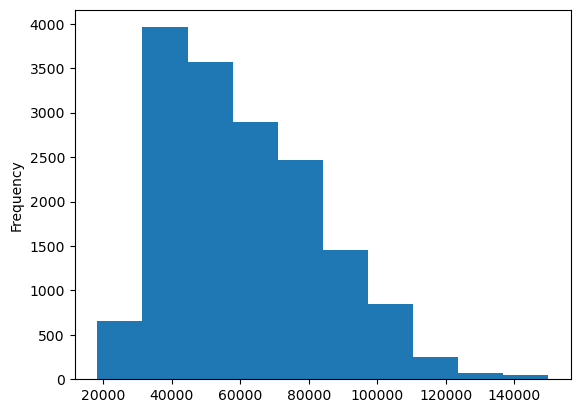

In [23]:
df['price'].plot(kind='hist')

## 箱型图

In [24]:
import matplotlib.pyplot as plt

In [25]:
import seaborn as sns

<Figure size 1000x800 with 0 Axes>

<AxesSubplot:xlabel='dist', ylabel='price'>

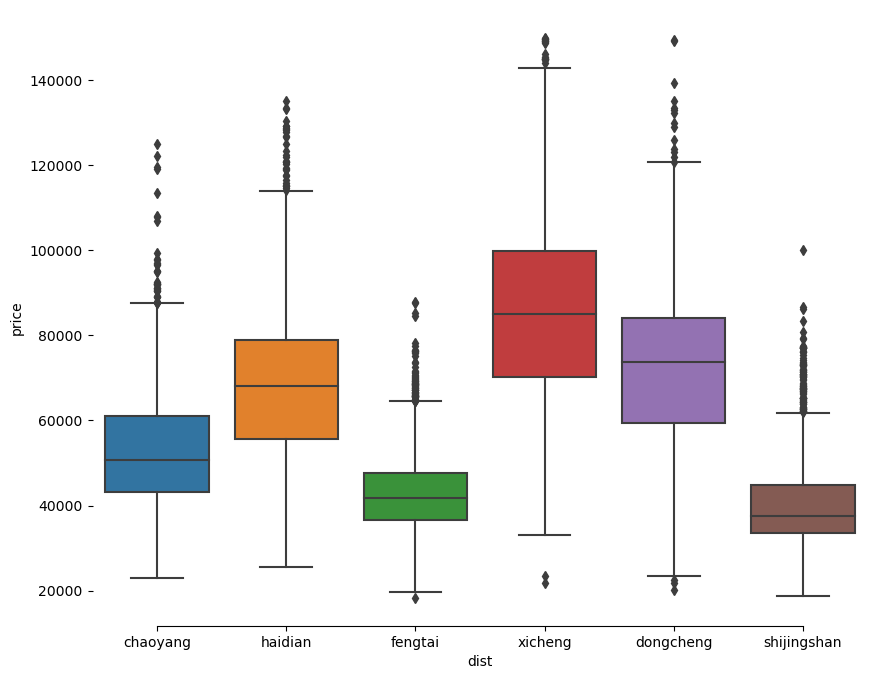

In [26]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='dist', y='price')
sns.despine(trim=True, left=True)